## Titanic
Vamos analisar os dados dos passageiros do Titanic. Começamos importando os dados de um arquivo csv ou carregando um dataset disponível no pacote Seaborn.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('titanic')

Para termos um entendimento inicial do data frame utilizado, podemos utilizar o comando shape. Como o nome sugere, este comando nos informará o formato do dataframe em termos de linhas e colunas.

In [3]:
df.shape

(891, 15)

Para entendermos melhor o formato do data frame, podemos utilizar o comando head, que lista os 5 primeiros registros do data frame.

In [4]:
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


pclass: Passenger class (1 = 1st; 2 = 2nd; 3 = 3rd). \
sex: Sex of the passenger (male or female). \
age: Age of the passenger (float number). \
sibsp: Number of siblings/spouses aboard. \
parch: Number of parents/children aboard. \
fare: Passenger fare (in British pounds). \
embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton).

Dá pra saber também os tipos de dados de cada coluna com o comando dtypes.

In [5]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

Outro ponto importante é entender que na maioria dos dataframes há dados incompletos. Para analisar quais dados estão imcompletos no nosso dataframe usaremos o comando isnull.

In [6]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Vamos agora usar um pouco de estatística descritiva para termos alguns insights a respeito das informações dos passageiros do Titanic. Vamos começar analisando a média, a mediana e a moda da idade dos passageiros.

In [7]:
df['age'].mean()

29.69911764705882

In [8]:
df['age'].median()

28.0

In [9]:
df['age'].mode()

0    24.0
Name: age, dtype: float64

In [10]:
df2 = df[df['survived']==0]
df2['age'].min()

1.0

Vamos agora plotar histogramas das colunas nas quais é possível aplicar a geração automática de histogramas. A geração automática depende do tipo de dado da coluna.

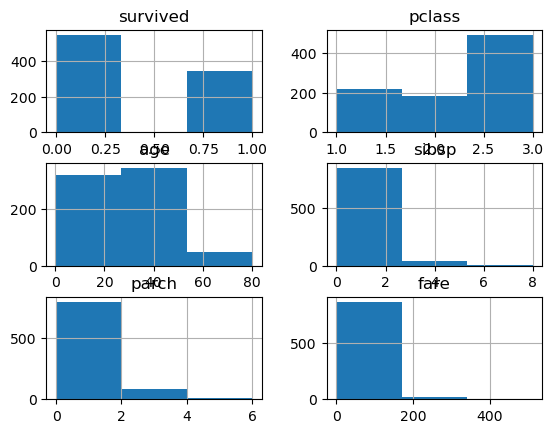

In [ ]:
hist = df.hist(bins=3) # TODO: fix

Vamos agora plotar um histograma de uma coluna específica (Idade).

array([[<Axes: title={'center': 'age'}>]], dtype=object)

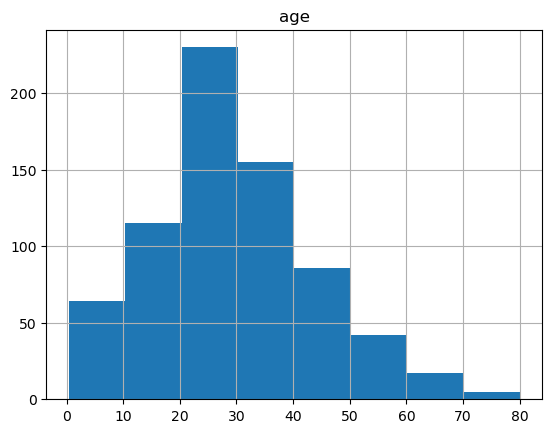

In [16]:
df.hist(column='age', bins=8)

Agora vamos plotar um histograma da tarifa paga por cada passageiro.

array([[<Axes: title={'center': 'fare'}>]], dtype=object)

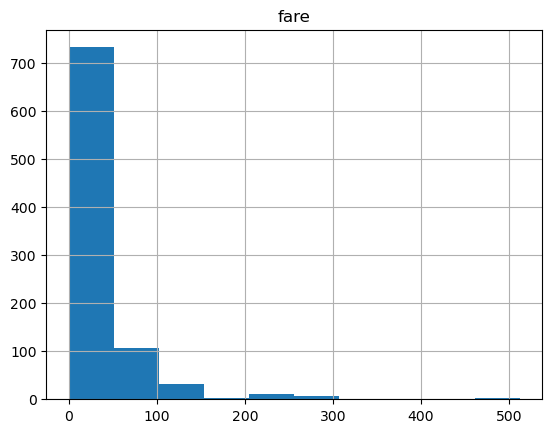

In [14]:
df.hist(column='fare')

Vamos analisar fatores que podem ter impactado a sobrevivência dos passageiros, começando pelo sexo. Vamos iniciar plotanto um gráfico que mostra o número de mortos e sobreviventes. 

<Axes: xlabel='alive', ylabel='count'>

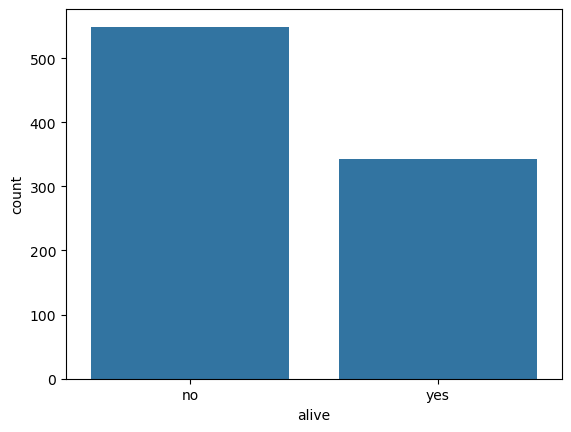

In [ ]:
sns.countplot(x='alive', data=df)

Mulheres e homens morreram em igual proporção?

<Axes: xlabel='sex', ylabel='count'>

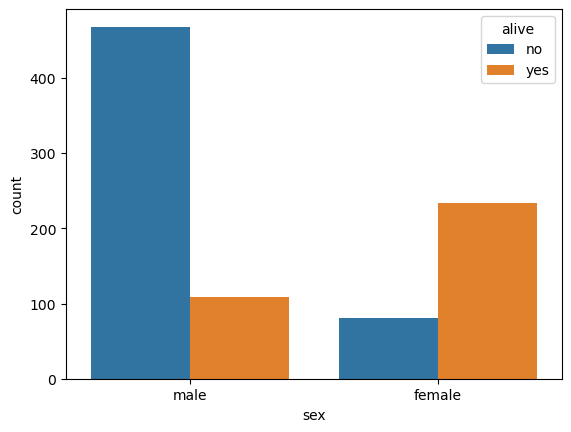

In [17]:

sns.countplot(x='sex', hue='alive', data=df)

A proporção de mortes foi igual em todas as classes do navio? (Primeira classe: mais cara; terceira classe: mais barata).

<Axes: xlabel='pclass', ylabel='count'>

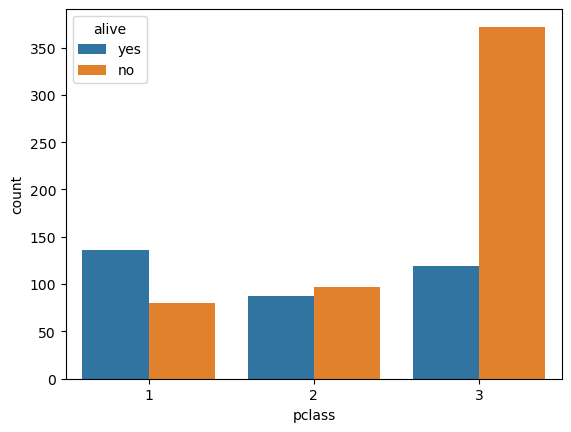

In [18]:
sns.countplot(x='pclass', hue='alive', data=df)

Gráficos de pizza são também interessantes para comparar proporções. Vamos plotar um gráfico de pizza para comparar o número total de sobreviventes vs não sobreviventes.

/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_22894/2454187525.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sobrev = df[df['survived']==1].count()[0]
/var/folders/f0/cfs4wy953p373457mrtkm3wm0000gn/T/ipykernel_22894/2454187525.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nao_sobrev = df[df['survived']==0].count()[0]


([<matplotlib.patches.Wedge at 0x179017ed0>,
 [Text(-1.0275626481479563, 0.3925748388921016, 'Sobreviveu'),
  Text(1.0275626849034607, -0.39257474268474213, 'Não sobreviveu')],
 [Text(-0.5604887171716125, 0.2141317303047827, '38.4%'),
  Text(0.5604887372200694, -0.21413167782804113, '61.6%')])

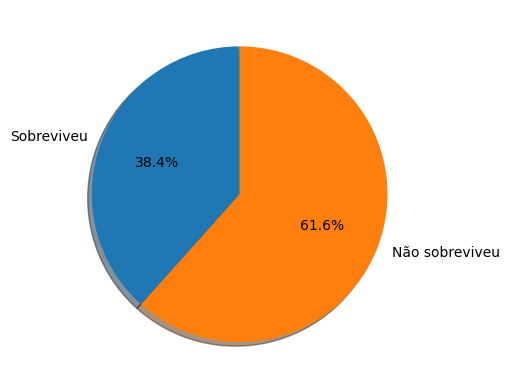

In [ ]:
sobrev = df[df['survived']==1].count()[0]
nao_sobrev = df[df['survived']==0].count()[0]
plt.pie([sobrev, nao_sobrev], labels=['Sobreviveu', 'Não sobreviveu'], autopct='%1.1f%%', shadow=True, startangle=90)